In [1]:
import os
import sys
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

/usr/local/lib/python3.6/site-packages/sklearn/utils/fixes.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if 'order' in inspect.getargspec(np.copy)[0]:


In [2]:
tweets = pd.read_csv('CSVs/tweet_data_20170825-155658.csv', header=None,
                    names = ['id', 'name', 'lat', 'long', 'url', 'caption'])
tweets

,id,name,lat,long,url,caption
0,901171567433990145,RayanZahab,34.383300,35.783300,https://t.co/0Qkpc4jkYh,Nowhere like home #northlebabon #liveloveleban...
1,901171567429681152,smlifeislovely,42.680340,-83.134220,https://t.co/QGvxm063ed,So fucking IN LOVE with my new pink hair!!! 💓💓...
2,901171569719947266,sihlemakeup,-25.746416,28.194781,https://t.co/nfhSCaDacH,Just posted a photo @ The South African State ...
3,901171574060965890,MichaelPlaster,34.052200,-118.243000,https://t.co/l7dElAnXK3,A part of the 24hr #Donation #Marathon to help...
4,901171576418291714,CMMurrayLLP,51.505149,-0.075585,https://t.co/kcrhSomaCf,Where it all began for our firm... #canarywhar...
5,901171584269987840,DriiPPy,51.567030,3.497227,https://t.co/LLVBtQShgI,D.R Do Whatever You Want...Because If You Just...
6,901171590984900608,DLo1066,32.802310,-79.737830,https://t.co/W5NVYeufwR,Windy Friday. #eclipse2017 #eclipsevacation #t...
7,901171592054673412,TebzahNxumalo,-29.844915,31.032833,https://t.co/sV2o1HWofs,.... Sparkle &amp; Shine 👑✨ (Without The Blaze...
8,901171596425146373,frankiecocktail,40.769167,-73.965556,https://t.co/0SK9knHlC9,Just posted a photo @ Upper East Side
9,901171598455169024,SUMTINFLY,41.879416,-87.672743,https://t.co/imPJlCtp8x,#ConsistencyIsKey #Sumtinfly Is The #Movement ...


In [3]:
%matplotlib inline

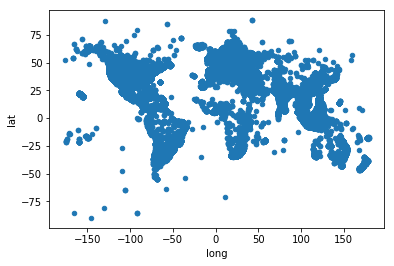

In [4]:
tweets.plot(kind='scatter', x='long', y='lat')

In [5]:
filtered_tweets = tweets[(tweets['lat'] > 24) & (tweets['lat'] < 50) &
    (tweets['long'] > -125) & (tweets['long'] < -66)]

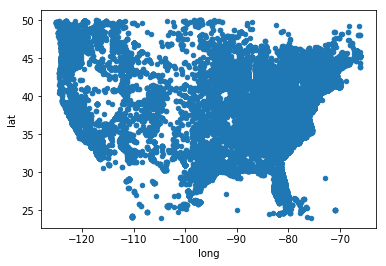

In [6]:
filtered_tweets.plot(kind='scatter', x='long', y='lat')

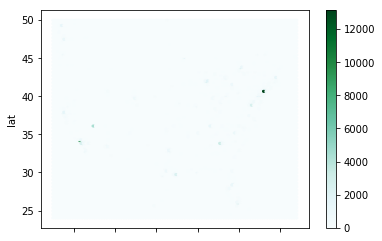

In [7]:
filtered_tweets.plot(kind='hexbin', x='long', y='lat')

In [8]:
# Using code from: http://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
# Also: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

In [9]:
# DBSCAN works best with scikit learn v0.15
# https://stackoverflow.com/questions/16381577/scikit-learn-dbscan-memory-usage

In [10]:
#coords = tweets.sample(frac=0.1).as_matrix(columns=['lat', 'long'])
km_between_points = 10  # important parameter for DBSCAN!

coords = tweets.as_matrix(columns=['lat', 'long'])
kms_per_radian = 6371.0088
epsilon = km_between_points / kms_per_radian
min_samples = 100

db = DBSCAN(eps=epsilon, min_samples=min_samples, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))


/usr/local/lib/python3.6/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(init)


Number of clusters: 342


In [11]:
type(clusters)

pandas.core.series.Series

In [12]:
def get_centermost_point(cluster):
    if cluster.size:
        centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
        centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
        return tuple(centermost_point)

centermost_points = [p for p in clusters.map(get_centermost_point) if p]


In [13]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})


In [14]:
rs = rep_points.apply(lambda row: tweets[(tweets['lat']==row['lat']) & (tweets['long']==row['lon'])].iloc[0], axis=1)


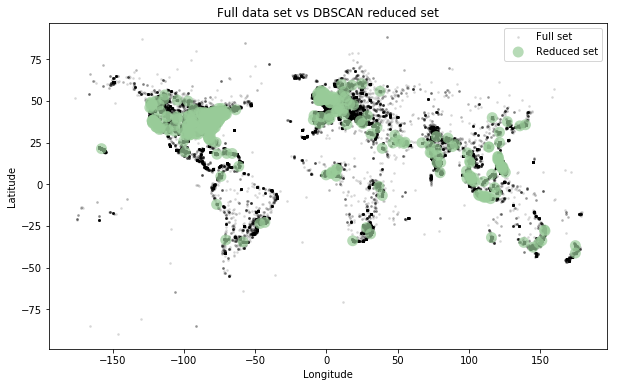

In [15]:
fig, ax = plt.subplots(figsize=[10, 6])
df_scatter = ax.scatter(tweets['long'], tweets['lat'], c='k', alpha=0.1, s=3)
rs_scatter = ax.scatter(rs['long'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [16]:
tweets2 = tweets[(tweets['lat'] > 24) & (tweets['lat'] < 50) &
    (tweets['long'] > -125) & (tweets['long'] < -66)]
rs2 = rs[(rs['lat'] > 24) & (rs['lat'] < 50) &
    (rs['long'] > -125) & (rs['long'] < -66)]

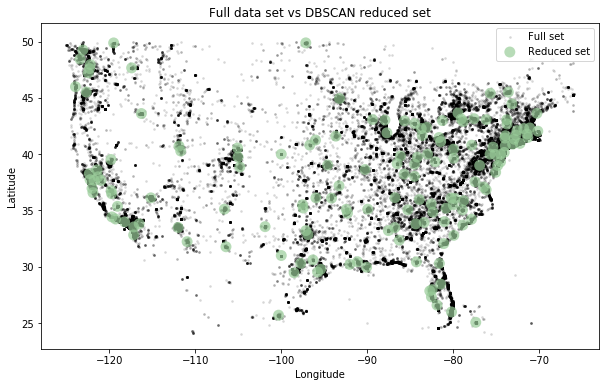

In [17]:
fig, ax = plt.subplots(figsize=[10, 6])
df_scatter = ax.scatter(tweets2['long'], tweets2['lat'], c='k', alpha=0.1, s=3)
rs_scatter = ax.scatter(rs2['long'], rs2['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()

In [18]:
# from sklearn.preprocessing import StandardScaler
# from itertools import cycle, islice

# n_samples = 1500
# X = np.random.rand(n_samples, 2)
# X[:, 0] = X[:, 0] * 360 - 180
# X[:, 1] = X[:, 1] * 180 - 90
# X

# max(cluster_labels)

# algorithm = db

# algorithm.fit(X)

# y_pred = algorithm.labels_.astype(np.int)

# #plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
# #if i_dataset == 0:
# #    plt.title(name, size=18)

# colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
#                                      '#f781bf', '#a65628', '#984ea3',
#                                      '#999999', '#e41a1c', '#dede00']),
#                               int(max(y_pred) + 1))))

# fig, ax = plt.subplots(figsize=[10, 6])
# ax.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

# #plt.xlim(-2.5, 2.5)
# #plt.ylim(-2.5, 2.5)
# #plt.xticks(())
# #plt.yticks(())


# y_pred

# y_pred.shape

# max(y_pred)

In [20]:
cluster_labels.size

335665

In [21]:
cluster_labels

array([-1,  7, 85, ..., 47, 64, 22])

In [23]:
tweets.shape

(335665, 6)

In [26]:
tweets

,id,name,lat,long,url,caption
0,901171567433990145,RayanZahab,34.383300,35.783300,https://t.co/0Qkpc4jkYh,Nowhere like home #northlebabon #liveloveleban...
1,901171567429681152,smlifeislovely,42.680340,-83.134220,https://t.co/QGvxm063ed,So fucking IN LOVE with my new pink hair!!! 💓💓...
2,901171569719947266,sihlemakeup,-25.746416,28.194781,https://t.co/nfhSCaDacH,Just posted a photo @ The South African State ...
3,901171574060965890,MichaelPlaster,34.052200,-118.243000,https://t.co/l7dElAnXK3,A part of the 24hr #Donation #Marathon to help...
4,901171576418291714,CMMurrayLLP,51.505149,-0.075585,https://t.co/kcrhSomaCf,Where it all began for our firm... #canarywhar...
5,901171584269987840,DriiPPy,51.567030,3.497227,https://t.co/LLVBtQShgI,D.R Do Whatever You Want...Because If You Just...
6,901171590984900608,DLo1066,32.802310,-79.737830,https://t.co/W5NVYeufwR,Windy Friday. #eclipse2017 #eclipsevacation #t...
7,901171592054673412,TebzahNxumalo,-29.844915,31.032833,https://t.co/sV2o1HWofs,.... Sparkle &amp; Shine 👑✨ (Without The Blaze...
8,901171596425146373,frankiecocktail,40.769167,-73.965556,https://t.co/0SK9knHlC9,Just posted a photo @ Upper East Side
9,901171598455169024,SUMTINFLY,41.879416,-87.672743,https://t.co/imPJlCtp8x,#ConsistencyIsKey #Sumtinfly Is The #Movement ...


In [33]:
new_tweets = tweets.loc[:, ['id', 'name', 'lat', 'long']]
new_tweets['cluster'] = pd.Series(cluster_labels)

In [35]:
new_tweets.to_csv('tweets_clustered.csv')